# Workshop NLP avec spacy


On travaille sur un corpus de 11k+ tweets recoltés de juin 2017 a juin 2018 sur le hastag #abeilles


Le fichier est abeilles.csv

Les colonnes sont 

* author_handle: nom du compte
* likes: nombres de likes du tweet
* mentions: autres comptes mentionnés 
* permalink: du tweet
* shares: nombre de RT
* source_favorites: nombre de likes du compte
* source_followers: nombre de followers du compte
* source_following: nombre de comote suivis par le compte
* tags: hashtags present dans le tweet
* main: le texte du tweet

# NLP

On va regarder la frequence 

* des mots
* des tags 

puis avec le part of speech tagging

* des adjectifs
* des noms

avec les noun chunks:

* les groupes de mots

et avec le named entity recognition

* des entités

* Une fois identifies les principales entities, quels sont les adjectifs qui leur sont le plus associés

# popularité des tweets

Graphiquement peut on determiner s'il y a un lien entre la popularité du compte et le nombre de retweet et de likes

* creer une nouvelle variable popularité du tweet = likes + shares 
* creer une nouvelle variable popularité du compte = source_followers + source_following

Afficher le scatterplot de l'une par rapport à l'autre et en deduire s;il y a correlation ou non.

De meme, est ce que la longueur du tweet, ou le nombre de hashtag, est corrélé avec la popularité du tweet ?

* Obtient on d'autres resultats si on restreint le dataset aux tweets avec au moins 1 share ou like ?


# Similarité

Beaucoup de tweet se ressemblent.

En utilisant le module similarity de spacy, et en prenant un de ces tweets peut on trouver les tweets qui lui sont similaires ?






In [17]:
import pandas as pd
import spacy

nlp = spacy.load('fr')

datapath = './'
filename = 'abeilles.csv'

In [18]:
df = pd.read_csv(datapath + filename, sep=',', error_bad_lines=False)
df.head()

,author_handle,likes,mentions,permalink,shares,source_favorites,source_followers,source_following,tags,main
0,BleuBlancCoeur,4.0,NaN,https://twitter.com/BleuBlancCoeur/status/8724...,5.0,5430.0,6420,3885.0,['abeilles'],« Des carences en oméga-3 pourraient expliquer...
1,VirginieDevigne,0.0,NaN,https://www.twitter.com/VirginieDevigne/status...,0.0,1302.0,154,723.0,"['StopNéonics', 'abeilles']",".@EPhilippePM résistez à la Com° EU, signez le..."
2,17070908,0.0,NaN,https://www.twitter.com/17070908/status/870697...,0.0,188.0,30,127.0,"['StopNéonics', 'abeilles']",".@N_Hulot résistez à la Com° EU, signez le déc..."
3,Cocop64,0.0,NaN,https://www.twitter.com/Cocop64/status/8710723...,0.0,0.0,0,0.0,"['StopNeonics', 'abeilles']",.@AgnesBuzyn Arrêtez le massacre des #abeilles...
4,mimi6werth,0.0,NaN,https://www.twitter.com/mimi6werth/status/8710...,0.0,0.0,0,0.0,"['StopNeonics', 'abeilles']",.@EPhilippePM Arrêtez le massacre des #abeille...


In [19]:
#On récupère la liste des tweets dans la colonne main
liste_tweets = df["main"]

#On récupère séparémment chaque mot de chaque tweet
liste_mots = []
for tweet in liste_tweets[0:100]:
    for mot in tweet.split():
        liste_mots.append(mot)

        

In [20]:
###Nettoyage de la liste###

#Suppression des hashtags

#Suppression des doublons
liste_mots_uniques = set(liste_mots)
len(liste_mots_uniques)

#Suppression de la ponctuation
#for mot in liste_mots_uniques:
    #if string.punctuation in mot:
        
#Suppression des mentions @

#Suppression des liens
        
#Suppression des mots inutiles

671

In [22]:
#Calcul fréquences mots
#dico = {}
liste_occurrences = []
for mot in liste_mots_uniques:
    #dico[mot] = liste_mots.count(mot)
    liste_occurrences.append({
        "mot" : mot, 
        "occurrence" : liste_mots.count(mot)
    })
    print("{} : {} occurrence(s)" .format(mot, liste_mots.count(mot)))


jardin. : 1 occurrence(s)
- : 8 occurrence(s)
miel : 1 occurrence(s)
UrbanBees : 1 occurrence(s)
rendements : 2 occurrence(s)
de : 40 occurrence(s)
Aujourd'hui, : 1 occurrence(s)
journal : 1 occurrence(s)
🍯🐝🌸 : 1 occurrence(s)
meilleur : 1 occurrence(s)
l'@ITSAPinstitut : 1 occurrence(s)
mortalité : 2 occurrence(s)
très : 2 occurrence(s)
flinguées : 1 occurrence(s)
#fleur, : 1 occurrence(s)
http://www.bioaddict.fr/article/agriculture-les-abeilles-transformees-en-esclaves-de-la-pollinisation-a5639p1.html : 2 occurrence(s)
riverains : 1 occurrence(s)
massacre : 9 occurrence(s)
@valhor_eqdv : 1 occurrence(s)
avant : 1 occurrence(s)
travaux : 1 occurrence(s)
http://www.franceagrimer.fr/Stockage-Actualites/PPAM/2017/Liste-des-plantes-attractives-pour-les-abeilles/(filiere)/2 : 1 occurrence(s)
meilleure : 3 occurrence(s)
#fleur : 1 occurrence(s)
sec. : 1 occurrence(s)
interconnectée : 2 occurrence(s)
#Tours : 1 occurrence(s)
ses : 1 occurrence(s)
Aricilik : 1 occurrence(s)
#SEDD2017 : 1 occu

In [24]:
import string

#On récupère la liste des tags dans la colonne tags
liste_tags = df["tags"]

#On récupère séparémment chaque chaque tag
liste_tags_split = []
for tag in liste_tags[0:500]:
    for tag_unique in tag.split():
        for punctuation in string.punctuation: #en supprimant la ponctuation
            if punctuation in tag_unique:
                tag_unique = tag_unique.replace(punctuation, "")
        liste_tags_split.append(tag_unique)



In [25]:
import matplotlib.pyplot as plt

#Suppression doublons
liste_tags_uniques = set(liste_tags_split)

#Calcul fréquences tags
liste_occurrences_tags = []

for tag in liste_tags_uniques:
    liste_occurrences_tags.append({"tag" : tag, "occurrence" : liste_tags_split.count(tag)})

    #print("{} : {} occurrence(s)" .format(tag, liste_tags_split.count(tag)))
liste_occurrences_tags[0:10]

[{'tag': 'APIdays', 'occurrence': 4},
 {'tag': 'miel', 'occurrence': 28},
 {'tag': 'néonicotinoides', 'occurrence': 1},
 {'tag': 'ENVIRONNEMENT', 'occurrence': 1},
 {'tag': 'rmc', 'occurrence': 1},
 {'tag': 'racisme', 'occurrence': 1},
 {'tag': 'pollinifère', 'occurrence': 1},
 {'tag': 'formation', 'occurrence': 1},
 {'tag': 'Gibles', 'occurrence': 1},
 {'tag': 'extinction', 'occurrence': 1}]

In [28]:
import numpy as np

liste_frequences = []
for i in range(len(liste_occurrences_tags)):
    liste_frequences.append(liste_occurrences_tags[i]["occurrence"])

condition = np.percentile(liste_frequences, 95)

for tag in liste_tags_uniques:
    if liste_tags_split.count(tag) > condition:
        print("{} : {} occurrences" .format(tag, liste_tags_split.count(tag)))


miel : 28 occurrences
Pesticides : 9 occurrences
bees : 12 occurrences
néonicotinoïdes : 81 occurrences
pollinisation : 6 occurrences
StopNéonics : 16 occurrences
Agriculture : 6 occurrences
abeilles : 500 occurrences
StopNeonics : 12 occurrences
ruche : 14 occurrences
fleurs : 17 occurrences
biodiversité : 12 occurrences
nature : 8 occurrences
pollen : 8 occurrences
ruches : 10 occurrences
insectes : 6 occurrences
apiculture : 25 occurrences
neonicotinoides : 11 occurrences
pesticides : 25 occurrences
environnement : 12 occurrences
pétition : 75 occurrences


5.0

In [41]:
#Autre méthode
import pandas
from collections import Counter

occurrences_counts = Counter(liste_tags_split)



# .most_common(10) 
df_occurences = pandas.DataFrame.from_dict(occurrences_counts.most_common(10) )
df_occurences.columns= ['tag', 'nombre']

df_occurences

,tag,nombre
0,abeilles,500
1,néonicotinoïdes,81
2,pétition,75
3,miel,28
4,apiculture,25
5,pesticides,25
6,fleurs,17
7,StopNéonics,16
8,ruche,14
9,StopNeonics,12


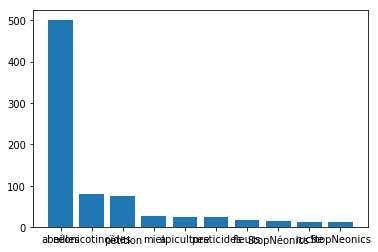

In [45]:

plt.bar(df_occurences.tag, df_occurences.nombre)

# df_occurences.plot(kind='bar', sort_columns = True)
plt.show()


Problème : comment afficher uniquement les tags les plus fréquents avec cette méthode ?

### Popularité

In [46]:
import pandas as pd

df = pd.read_csv(datapath + filename, sep=',', error_bad_lines=False)

df["Popularité tweet"] = df.likes + df.shares
df["Popularité compte"] = df.source_followers + df.source_following

In [47]:
df["Popularité compte"].shape

(11246,)

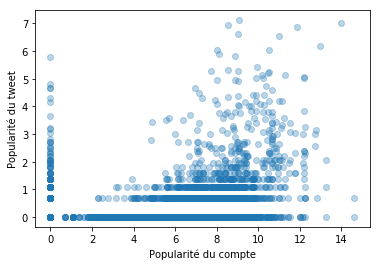

In [55]:
plt.scatter(np.log(df["Popularité compte"] + 1), np.log(df["Popularité tweet"]+1) , alpha = 0.3)
plt.xlabel("Popularité du compte")
plt.ylabel("Popularité du tweet")
plt.show()


In [203]:
for tweet in liste_tweets:
    df["Longueur tweet"] = len(tweet)
:


0        538
1        538
2        538
3        538
4        538
5        538
6        538
7        538
8        538
9        538
10       538
11       538
12       538
13       538
14       538
15       538
16       538
17       538
18       538
19       538
20       538
21       538
22       538
23       538
24       538
25       538
26       538
27       538
28       538
29       538
        ... 
11216    538
11217    538
11218    538
11219    538
11220    538
11221    538
11222    538
11223    538
11224    538
11225    538
11226    538
11227    538
11228    538
11229    538
11230    538
11231    538
11232    538
11233    538
11234    538
11235    538
11236    538
11237    538
11238    538
11239    538
11240    538
11241    538
11242    538
11243    538
11244    538
11245    538
Name: Longueur tweet, Length: 11246, dtype: int64

In [57]:
# colonne longueur du tweet

df['len_tweet'] = 0

for i,d in df.iterrows():
    df.loc[i, 'len_tweet'] = len(d.main)

df.head()


,author_handle,likes,mentions,permalink,shares,source_favorites,source_followers,source_following,tags,main,Popularité tweet,Popularité compte,len_tweet
0,BleuBlancCoeur,4.0,NaN,https://twitter.com/BleuBlancCoeur/status/8724...,5.0,5430.0,6420,3885.0,['abeilles'],« Des carences en oméga-3 pourraient expliquer...,9.0,10305.0,201
1,VirginieDevigne,0.0,NaN,https://www.twitter.com/VirginieDevigne/status...,0.0,1302.0,154,723.0,"['StopNéonics', 'abeilles']",".@EPhilippePM résistez à la Com° EU, signez le...",0.0,877.0,112
2,17070908,0.0,NaN,https://www.twitter.com/17070908/status/870697...,0.0,188.0,30,127.0,"['StopNéonics', 'abeilles']",".@N_Hulot résistez à la Com° EU, signez le déc...",0.0,157.0,108
3,Cocop64,0.0,NaN,https://www.twitter.com/Cocop64/status/8710723...,0.0,0.0,0,0.0,"['StopNeonics', 'abeilles']",.@AgnesBuzyn Arrêtez le massacre des #abeilles...,0.0,0.0,111
4,mimi6werth,0.0,NaN,https://www.twitter.com/mimi6werth/status/8710...,0.0,0.0,0,0.0,"['StopNeonics', 'abeilles']",.@EPhilippePM Arrêtez le massacre des #abeille...,0.0,0.0,112
